In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

df = pd.read_excel('/Users/Ryu Seung Gwon/sgryu/대외활동/공모전/data/서울특별시_고립은둔 청년 실태조사 결과_20221231/★DATA_서울시 고립은둔청년 실태조사(청년조사)_v1_230127.xlsx')

In [3]:
COL_CAT = ['SQ4','SQ6_R','A1','A7','A9','A13_1','A13_2','A13_3','A13_4','A15','A17','A18_1',
 'A18_2','A18_3','A18_4','A19_1','A19_2','A19_3','A19_4','A19_5','A19_6','A20_1',
'A20_2','A20_3','A20_4','A20_5','A20_6','A20_7','A20_8','B1_1','B1_2','B7','B8','B9_1','B9_2',
'B9_4','B10','B11','B12_1','B12_2','B12_3','B12_4','B12_5','B12_6','B12_7','B12_8','B12_9','DQ1','DQ5','DQ6'
          ]
COL_Y = ['KEY_1']
COL_NULL = ['SQ5', 'A5', 'A6', 'A10', 'A11', 'B2', 'B2_R', 'B3', 'B4', 'B5_2', 'B5_3', 'DQ2', 'DQ3']   # A4_1 제거

## 결측치가 적은 변수 추가한 코드 A4_1은 모두 같은 값으로 되어 있어 의미가 없다고 판단, 제거.

from sklearn.impute import SimpleImputer

for col in COL_NULL:
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
    df[COL_NULL] = imputer.fit_transform(df[COL_NULL])

train = df[COL_CAT + COL_NULL]
y_tr = df[['KEY_1']]

In [4]:
x_train, x_val, y_train, y_val = train_test_split(train, y_tr, test_size = 0.3)
modelRF = RandomForestClassifier(n_estimators= 100, random_state = 2024)
modelRF.fit(x_train, y_train)

modelRF_pred = modelRF.predict(x_val)
modelRF_score = roc_auc_score(y_val, modelRF_pred)

print(modelRF_score) 

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8115962675404231


In [5]:
print(modelRF.feature_importances_)

[0.01828703 0.01131017 0.03466623 0.04999773 0.00517561 0.01986543
 0.02280771 0.14047095 0.08455078 0.00497938 0.00414271 0.01896448
 0.0251846  0.00928448 0.01337124 0.00453159 0.00462341 0.00489986
 0.00427725 0.00339944 0.0053835  0.00281456 0.00504446 0.00451397
 0.00337883 0.00453888 0.00501898 0.00369885 0.00371964 0.01987449
 0.01566669 0.00916157 0.01105959 0.01083386 0.00855722 0.01419841
 0.01580148 0.00554094 0.02006414 0.01781512 0.01147827 0.00993716
 0.00873974 0.01248043 0.01100887 0.00925412 0.01077512 0.01449328
 0.01081116 0.0109341  0.00765762 0.01024923 0.02037374 0.03473733
 0.0454978  0.01314004 0.00565912 0.01046711 0.00731965 0.01274314
 0.01379347 0.02974215 0.0072321 ]


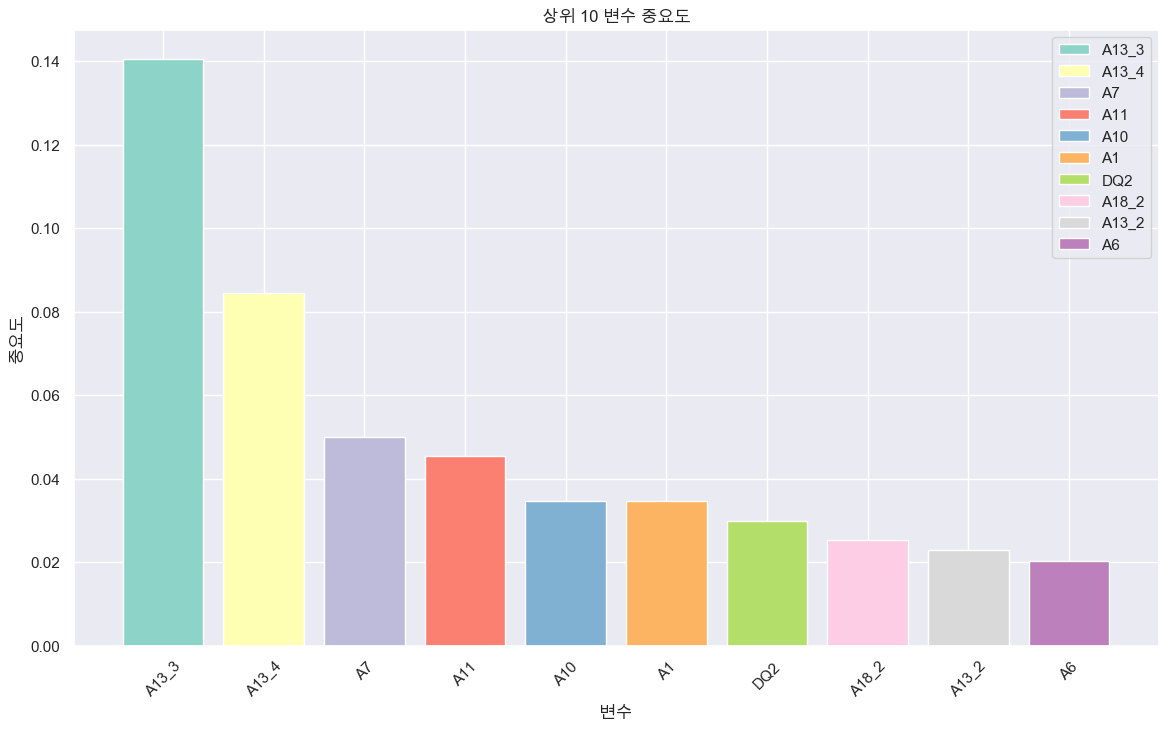

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

importances = modelRF.feature_importances_
indices = np.argsort(importances)[::-1]

top_features = 10
top_indices = indices[:top_features]
palette = sns.color_palette('Set3', n_colors=top_features)
sns.set(style='darkgrid')
font_path = "/Library/Fonts/Arial Unicode.ttf"  # 사용하는 운영체제에 따라 경로를 바꿔주세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.figure(figsize=(14, 8))
plt.title("상위 10 변수 중요도")
bars = plt.bar(range(top_features), importances[top_indices], align="center", color=palette)
plt.xticks(range(top_features), train.columns[top_indices], rotation=45)
plt.xlabel("변수")
plt.ylabel("중요도")
for bar, label in zip(bars, train.columns[top_indices]):
    bar.set_label(label)
plt.legend()

plt.show()
